In [74]:
##########THIS notebook tries to fill in mortality data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_dir = "../Data/Mortality/mortal_a.csv"
data = pd.read_csv(data_dir)

In [75]:
data.isna().sum().sum()/(121*31)   #we have 12% elements filled

0.8770994401492935

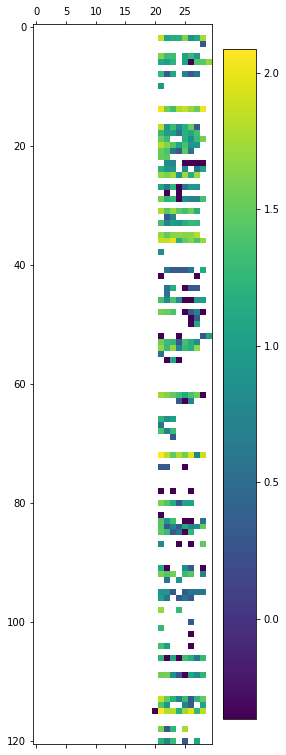

In [88]:
plt.matshow(np.log(np.log(data.values[:,1:].astype(float))))
plt.colorbar()

In [70]:
data = data.filter(regex='20??')
try:
    data = data.drop(columns=['1992']);
except:
    pass
data;

In [72]:
from sklearn.decomposition import TruncatedSVD

In [40]:
import numpy as np
from scipy.sparse.linalg import svds
from functools import partial


def emsvd(Y, k=None, tol=10, maxiter=None):
    """
    Approximate SVD on data with missing values via expectation-maximization

    Inputs:
    -----------
    Y:          (nobs, ndim) data matrix, missing values denoted by NaN/Inf
    k:          number of singular values/vectors to find (default: k=ndim)
    tol:        convergence tolerance on change in trace norm
    maxiter:    maximum number of EM steps to perform (default: no limit)

    Returns:
    -----------
    Y_hat:      (nobs, ndim) reconstructed data matrix
    mu_hat:     (ndim,) estimated column means for reconstructed data
    U, s, Vt:   singular values and vectors (see np.linalg.svd and 
                scipy.sparse.linalg.svds for details)
    """

    if k is None:
        svdmethod = partial(np.linalg.svd, full_matrices=False)
    else:
        svdmethod = partial(svds, k=k)
    if maxiter is None:
        maxiter = np.inf

    # initialize the missing values to their respective column means
    mu_hat = np.nanmean(Y, axis=0, keepdims=1)
    valid = np.isfinite(Y)
    Y_hat = np.where(valid, Y, mu_hat)

    halt = False
    ii = 1
    v_prev = 0

    while not halt:

        # SVD on filled-in data
        U, s, Vt = svdmethod(Y_hat - mu_hat)

        # impute missing values
        Y_hat[~valid] = (U.dot(np.diag(s)).dot(Vt) + mu_hat)[~valid]

        # update bias parameter
        mu_hat = Y_hat.mean(axis=0, keepdims=1)

        # test convergence using relative change in trace norm
        v = s.sum()
        if ii >= maxiter or ((v - v_prev) / v_prev) < tol:
            halt = True
        ii += 1
        v_prev = v

    return Y_hat, mu_hat, U, s, Vt 

In [39]:
emsvd(data)

C:\Users\surface\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice


LinAlgError: SVD did not converge

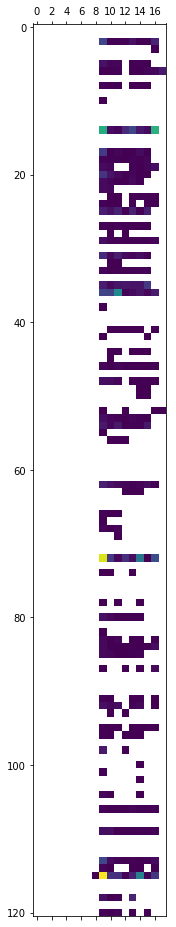

In [73]:
plt.matshow(data)

In [57]:
year = [str(i) for i in range(2000,2018)]
year_t = [str(i) for i in range(0,18)]
count = []
for i in range(18):
    count.append(data[year[i]].isna().sum())
    

([<matplotlib.axis.XTick at 0x2463ad77630>,
 <a list of 18 Text xticklabel objects>)

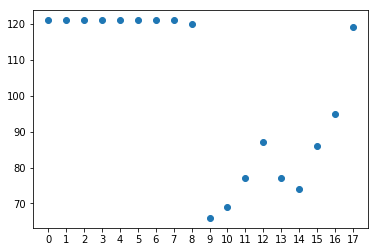

In [61]:
plt.scatter(year,count)
plt.xticks(year, year_t)

[121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 120,
 66,
 69,
 77,
 87,
 77,
 74,
 86,
 95,
 119]